# A3 - Analyzing Selected Repositories
This notebooks analyzes features from repositories that where selected for futher analysis, i.e. the repositories that had Python or Jupyter Notebook as a Primary Language.

Besides their name, owner and description the following features were collected with each repository:
 - Primary language and number of languages in total
 - Number of contributors
 - Number, types and frequency of Commits
 - Number of branches and tags
 - Number of pull requests and issues
 - Number of watchers, forks, stargazers and releases
 - Disk usage and the dates the repository was created and last pushed


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect, Notebook, PythonFile
from src.helpers.h7_analysis_helpers import get_python_version
from src.config.states import REP_COLLECTED, REP_FILTERED, REP_DISCARDED
from src.config.states import NB_AGGREGATED, PF_AGGREGATED
from src.helpers.h7_analysis_helpers import calculate_frequencies

from src.config.consts import DB_DIR
import sqlite3

In [2]:
conn = sqlite3.connect(DB_DIR + '/final.sqlite')

### Commits

### Types of Commits

In [3]:
all_commits = pd.read_sql_query("SELECT * FROM commits", conn)
normal_commits = all_commits[all_commits.type=="commit"]
merge_commits = all_commits[all_commits.type=="merge"]
print("In all repositories {} commits were found, that are divided in:".format( len(all_commits)))
print("- Normal Commits: {} ({})".format(len(normal_commits), len(normal_commits)*100/len(all_commits)))
print("- Merge Commits: {} ({})".format(len(merge_commits), len(merge_commits)*100/len(all_commits)))
display(all_commits)

In all repositories 2610517 commits were found, that are divided in:
- Normal Commits: 2472024 (94.69480566493151)
- Merge Commits: 138493 (5.305194335068494)


,id,machine,repository_id,type,hash,date,author,message,created_at,updated_at
0,1,pegasus,5024,commit,3477078,2019-01-19 08:58:56.000000,AzucenaCoronel,adding first file,2023-06-02 01:06:41.927510,None
1,2,pegasus,5024,commit,2b12ddc,2014-05-12 12:32:05.000000,AzucenaCoronel,Initial commit,2023-06-02 01:06:41.927766,None
2,3,pegasus,31702,commit,04d5341,2017-03-23 13:59:11.000000,AutomatedTester,added code to search pushes and close intermit...,2023-06-02 01:06:42.950006,None
3,4,pegasus,31702,commit,bafe06d,2015-06-19 00:15:02.000000,AutomatedTester,show intermittents closed in last 120 days,2023-06-02 01:06:42.950180,None
4,5,pegasus,31702,commit,d2aa82a,2015-06-05 19:54:29.000000,AutomatedTester,correcting search time and ignoring orange bom...,2023-06-02 01:06:42.950256,None
...,...,...,...,...,...,...,...,...,...,...
2610512,700000242756,apollo,324016,commit,3b2184f,2023-03-16 16:37:31.000000,joseossa18,Add files via upload,2023-06-16 16:24:07.423880,None
2610513,700000242757,apollo,325284,commit,3db0e35,2023-03-22 05:31:56.000000,ArnabDutta6,Added the .ipynb file,2023-06-16 16:24:09.080313,None
2610514,700000242758,apollo,325284,commit,fdddfb8,2023-03-22 05:30:04.000000,ArnabDutta6,Update README.md,2023-06-16 16:24:09.080456,None
2610515,700000242759,apollo,325284,commit,fb8dc53,2023-03-22 04:54:59.000000,ArnabDutta6,Initial commit,2023-06-16 16:24:09.080518,None


### Average of Commits

In [4]:
normal_commits_per_repository = normal_commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
normal_mean =  normal_commits_per_repository.commits.mean()

merge_commits_per_repository = merge_commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
merge_mean =  merge_commits_per_repository.commits.mean()

print("Considering all repositories, on average each repository"
      " has %.2f normal commits and %.2f merge commits."
      % (normal_mean, merge_mean))

Considering all repositories, on average each repository has 17.93 normal commits and 6.58 merge commits.


In [5]:
display(normal_commits_per_repository[normal_commits_per_repository["commits"]>10000])

,repository_id,commits
1,69313,15696
0,320234,32477


In [6]:
display(merge_commits)

,id,machine,repository_id,type,hash,date,author,message,created_at,updated_at
14,15,pegasus,41884,merge,e3ae2bd,2015-12-17 03:58:49.000000,Jesse Lybianto,Merge pull request #1 from jlybianto/test_merge,2023-06-02 01:06:44.571848,None
100,101,pegasus,42144,merge,3367721,2015-10-30 04:32:51.000000,ddrum001,revised directions,2023-06-02 01:06:57.205056,None
101,102,pegasus,42144,merge,7efbad7,2015-10-30 04:19:09.000000,Ronak Nathani,Merge branch 'master' of https://github.com/In...,2023-06-02 01:06:57.205107,None
102,103,pegasus,42144,merge,ecb6548,2015-10-30 04:16:01.000000,Ronak Nathani,Merge branch 'master' of https://github.com/In...,2023-06-02 01:06:57.205161,None
103,104,pegasus,42144,merge,3869a25,2015-10-30 03:52:37.000000,Ronak Nathani,Merge branch 'master' of https://github.com/In...,2023-06-02 01:06:57.205212,None
...,...,...,...,...,...,...,...,...,...,...
2610083,700000242327,apollo,323472,merge,07d6b30,2023-03-29 15:24:36.000000,George,Merge branch 'main' of https://github.com/Scar...,2023-06-16 16:12:42.697070,None
2610161,700000242405,apollo,288033,merge,86c4bc3,2022-08-25 22:44:40.000000,gabriel,Merge pull request #1 from gabriel-jap/master,2023-06-16 16:23:19.515387,None
2610223,700000242467,apollo,304302,merge,27cad27,2022-12-11 22:56:41.000000,aranusco,Merge branch 'main' of https://github.com/Emil...,2023-06-16 16:23:30.043098,None
2610224,700000242468,apollo,304302,merge,3f54db2,2022-12-10 21:42:33.000000,Emilio Ginzo,Merge branch 'main' of https://github.com/Emil...,2023-06-16 16:23:30.043142,None


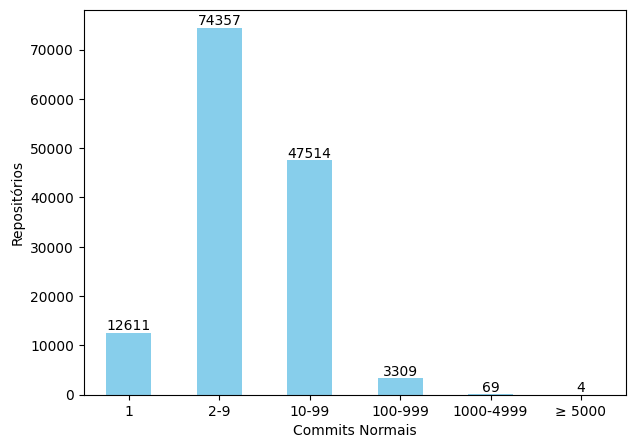

In [7]:
fig1, ax1 = plt.subplots( figsize=(7, 5))

commits = normal_commits_per_repository.commits\
    .value_counts(dropna=False, bins = [0, 1,9,99,999, 4999, 100000])\
    .sort_index().to_frame("Repositories")
commits.plot.bar(color='skyblue', ax=ax1,
                   xlabel='Commits Normais', ylabel='Repositórios').get_legend().remove()

ax1.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1', '2-9', '10-99','100-999', '1000-4999', '≥ 5000'], rotation=0)
ax1.bar_label(ax1.containers[0], label_type='edge');

fig1.savefig("outputs/commits2.png", dpi=500, format='png')

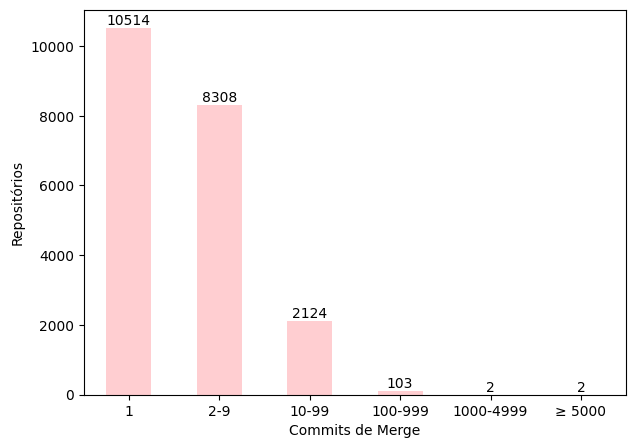

In [8]:
fig2, ax2 = plt.subplots( figsize=(7, 5))

merges = merge_commits_per_repository.commits\
    .value_counts(dropna=False, bins = [0, 1,9,99,999, 4999, 100000])\
    .sort_index().to_frame("Repositories")
merges.plot.bar(color='#FFCED1', ax=ax2,
                   xlabel='Commits de Merge', ylabel='Repositórios').get_legend().remove()

ax2.set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['1', '2-9', '10-99','100-999', '1000-4999', '≥ 5000'], rotation=0)
ax2.bar_label(ax2.containers[0], label_type='edge')

fig2.savefig("outputs/commits3.png", dpi=500, format='png')

### How often are commits made?
In this section we investigate how long it takes from one commit to another.

In [9]:
normal_commits["date"] = pd.to_datetime(normal_commits["date"])
merge_commits["date"] = pd.to_datetime(merge_commits["date"])

/tmp/ipykernel_3322/4177743454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_commits["date"] = pd.to_datetime(normal_commits["date"])
/tmp/ipykernel_3322/4177743454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_commits["date"] = pd.to_datetime(merge_commits["date"])


In [10]:
repositories_with_normal_commits = calculate_frequencies(normal_commits_per_repository, normal_commits)
normal_mean = repositories_with_normal_commits.frequency_timedelta.mean()

1
9
12
21
22
23
24
26
27
30
43
46
48
51
55
58
63
76
78
82
84
88
96
97
98
103
114
150
171
185
196
198
205
208
221
224
253
259
264
268
278
304
329
335
336
337
354
371
405
412
438
442
454
455
458
460
474
478
482
487
495
498
499
503
505
508
524
530
541
543
550
552
557
560
575
582
590
591
592
594
599
610
618
622
627
632
647
653
656
664
668
678
684
689
690
699
704
705
706
707
709
710
712
720
726
730
732
733
738
740
748
753
755
756
779
790
805
809
811
813
826
828
829
831
833
834
836
837
839
842
844
847
853
861
868
875
880
881
887
890
897
904
905
906
907
908
910
915
918
1027
1434
1515
1755
1854
2127
2243
2545
2737
2887
3339
3345
3462
3581
3631
3954
3967
3976
4168
4205
4339
4370
4380
4381
4397
4427
4489
4897
4985
5024
5217
5494
5737
5742
5807
5873
6251
6255
6266
6278
6425
6482
6676
6896
7180
7263
7363
7469
7477
7553
7561
8329
8728
8739
8755
8787
8796
8803
8817
8819
8869
8932
9019
9026
9185
9211
9411
9441
9503
9677
9739
9748
9750
9859
10035
10289
10364
10544
10575
10790
10900
10923
10931
10942
1

In [11]:
repositories_with_merge_commits = calculate_frequencies(merge_commits_per_repository, merge_commits)
merge_mean = repositories_with_merge_commits.frequency_timedelta.mean()

22
23
48
51
55
58
76
78
82
103
196
198
208
253
268
336
354
438
454
455
487
498
543
550
557
575
590
610
627
647
653
707
710
712
720
738
748
756
805
813
826
828
829
831
833
836
837
839
847
853
880
881
908
915
918
1027
2243
2545
2887
3339
3581
3967
3976
4339
4380
4397
4489
4897
5217
5494
5737
6255
6278
6425
6482
7180
7263
7477
8329
8728
9026
9503
9677
9739
9750
10289
10790
10923
10942
11130
11378
11983
12588
12698
12707
12722
13002
13317
13466
13538
14167
14463
14473
14477
14496
14514
14515
14537
14562
14858
15513
15592
16007
16201
16225
16550
16694
16900
16937
16973
17148
17158
17574
17591
17643
17756
17935
18910
20113
20161
20187
20204
20210
20261
20739
21277
21449
21983
22350
22443
22470
22548
22673
22774
23082
23248
23273
23288
23322
23326
23327
23332
23462
23489
23601
23641
23666
23688
23737
23751
24056
24078
24143
24410
24463
24634
24648
24803
24841
24939
25124
25292
25545
25573
25601
25602
25606
25801
25966
26126
26175
26646
26842
27088
27110
27146
27175
27312
27334
27684
27710
277

In [12]:
print("Considering all {} repositories:".format(len(normal_commits_per_repository)))
print("- Normal Commits are made on average every {}.".format(normal_mean))
print("- Merge Commits are made on average every {}.".format(merge_mean))

Considering all 137864 repositories:
- Normal Commits are made on average every 10 days 10:02:40.482721492.
- Merge Commits are made on average every 31 days 06:52:07.841259500.


In [17]:
display(repositories_with_normal_commits)

,repository_id,commits,frequency_timedelta,frequency_in_days
22249,1,24,0 days 04:12:46.217391304,0.0
37560,9,14,1 days 01:56:28.615384615,1.0
56310,12,8,15 days 09:47:07.714285714,15.0
86549,21,4,4 days 09:01:25.666666666,4.0
2641,22,116,21 days 11:54:01.452173913,21.0
...,...,...,...,...
125997,327007,1,NaT,NaN
93629,327008,3,0 days 13:43:52.500000,0.0
86814,327009,4,0 days 00:02:12.333333333,0.0
128766,327011,1,NaT,NaN


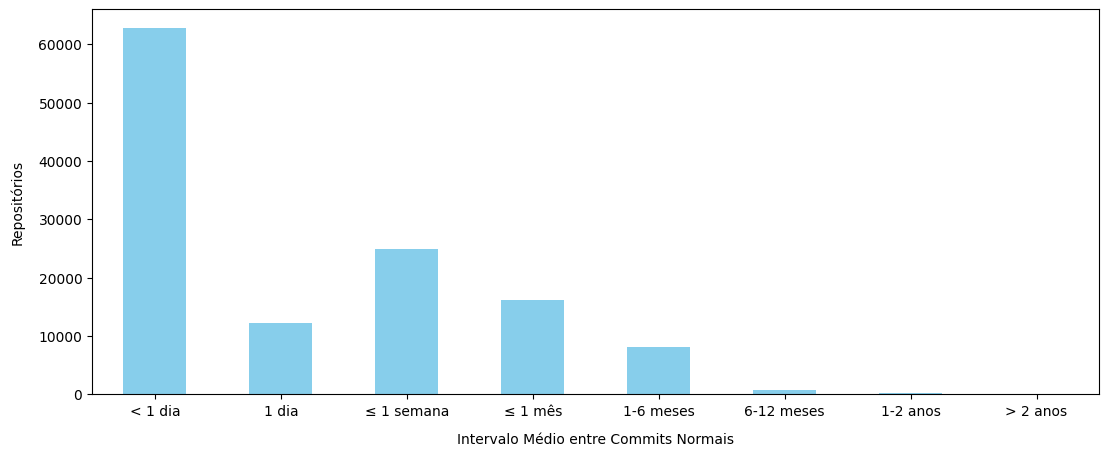

In [51]:
fig6, ax6 = plt.subplots(figsize=(13,5))
normal_commits_counter = repositories_with_normal_commits.frequency_in_days.value_counts(dropna=False, bins = [-1, 0,1,7,30,180, 365, 730, 3650])\
    .sort_index().to_frame("Repositories")

normal_commits_counter.plot.bar(ax=ax6, color='skyblue').get_legend().remove()
ax6.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7],
                labels=['< 1 dia', '1 dia','≤ 1 semana', '≤ 1 mês', '1-6 meses',
                        '6-12 meses','1-2 anos', '> 2 anos'], rotation=0)
ax6.set_xlabel("Intervalo Médio entre Commits Normais", labelpad=10)
ax6.set_ylabel("Repositórios", labelpad=10)
fig6.savefig("outputs/intervalo1.png", dpi=500, format='png');

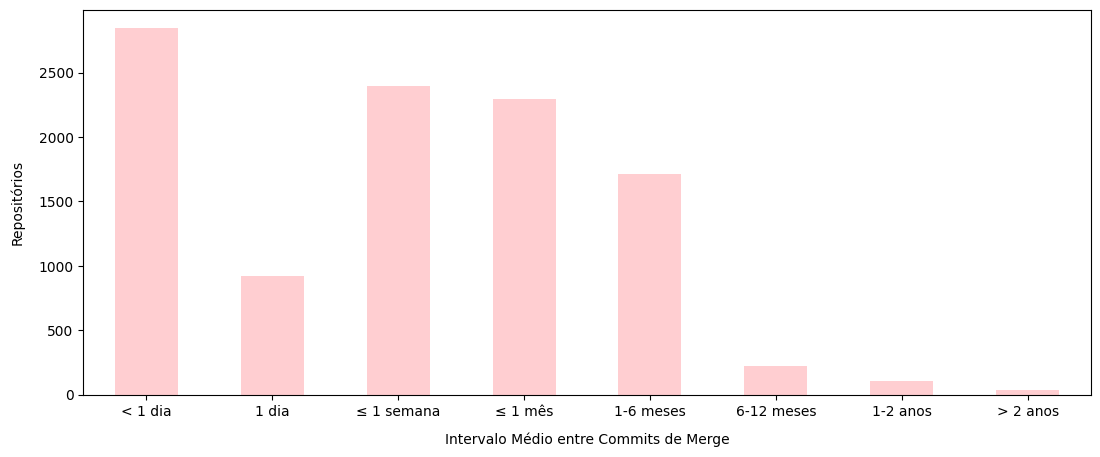

In [52]:
fig7, ax7 = plt.subplots(figsize=(13,5))
merge_commits_counter = repositories_with_merge_commits.frequency_in_days.value_counts(dropna=False, bins = [-1, 0,1,7,30,180, 365, 730, 3650])\
    .sort_index().to_frame("Repositories")

merge_commits_counter.plot.bar(ax=ax7, color='#FFCED1').get_legend().remove()
ax7.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7],
                labels=['< 1 dia', '1 dia','≤ 1 semana', '≤ 1 mês', '1-6 meses',
                        '6-12 meses','1-2 anos', '> 2 anos'], rotation=0)
ax7.set_xlabel("Intervalo Médio entre Commits de Merge", labelpad=10)
ax7.set_ylabel("Repositórios", labelpad=10);
fig7.savefig("outputs/intervalo.png", dpi=500, format='png');

#### Jupyter Notebooks
 Which languages are they in? Which versions?

In [4]:
repositories = pd.read_sql_query("SELECT * FROM repositories", conn)

selected = repositories[(~repositories.state.isin([REP_COLLECTED, REP_FILTERED, REP_DISCARDED]))]
print('Total of Repositories Selected: ', len(selected))

Total of Repositories Selected:  139041


In [8]:
notebooks = pd.read_sql_query("SELECT * FROM notebooks", conn)
print('- A total of Notebooks:', len(notebooks))

- A total of Notebooks: 1041556


In [ ]:
python_files = pd.read_sql_query("SELECT * FROM python_files", conn)
print('- A total of Python Files:', len(python_files))

In [ ]:
languages = notebooks.language\
    .value_counts(dropna=False)\
    .rename_axis('primary_language')\
    .to_frame("Notebooks").reset_index(drop=False)\
    .sort_values(by='Notebooks', ascending=False)

top_langs= languages[:3].reset_index(level=0)
others = pd.DataFrame(data = {
    'primary_language' : ['Outras'],
    'Notebooks' : [languages['Notebooks'][3:].sum()]
})

languages2 = pd.concat([top_langs,others]).reset_index(drop=True)\
    .sort_values(by='Notebooks', ascending=False)


fig1, ax1 = plt.subplots( figsize=(7,5))
languages2.plot.bar(ax=ax1, y='Notebooks', x='primary_language', color="darkgrey",
                    xlabel='Linguagens', ylabel='Notebooks').get_legend().remove()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ticks=[0, 1, 2, 3],
           labels=['Python','Desconhecida','R', 'Outras'], rotation=0)
ax1.bar_label(ax1.containers[0], label_type='edge');

fig2, ax2 = plt.subplots( figsize=(7,5))
languages2.plot.pie(ax=ax2, y="Notebooks", title="Most Popular Languages",
             labels=["Python","R","Unknown", "other"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()

In [ ]:
languages = notebooks.language\
    .value_counts(dropna=False)\
    .rename_axis('primary_language')\
    .to_frame("Notebooks").reset_index(drop=False)\
    .sort_values(by='Notebooks', ascending=False)
display(languages)

In [ ]:


languages.plot.pie(ax=ax1, y="Notebooks", title="Most Popular Languages",
             labels=["Python","R","Unknown"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()


print("Out of {} Notebooks:".format(len(notebooks)))
print('- Python Notebooks:', languages["Notebooks"][0])
print('- R Notebooks:', languages["Notebooks"][1])
print('- Unkwon language Notebooks:', languages["Notebooks"][2])

Since most notebooks are in Python, henceforth we will only analyze those in Python

In [ ]:
python_notebooks = notebooks.query("language == 'python'")

The most common Python Versions and Notebook Formats are:

In [ ]:
fig2, ax2 = plt.subplots(ncols=2, figsize=(15,5))
python_version = get_python_version(python_notebooks)
python_version.plot.pie(ax=ax2[0], y="Notebooks", title="Most Common Python Versions in Jupyter Notebooks",
             labels=python_version["Versions"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()

nb_format = python_notebooks.nbformat.value_counts(dropna=False)\
        .rename_axis('Formats').to_frame("Notebooks").reset_index(level=0)
nb_format.plot.pie(ax=ax2[1], y="Notebooks", title="Most Common Notebook Format in Jupyter Notebooks",
             labels=nb_format["Formats"], ylabel='',cmap="cool",
             autopct='%1.1f%%', ).get_legend().remove()



#### Valid Notebooks
Before extracting data from the notebooks we excluded those that were empty or did not have a kernel or notebook format.
After the extraction, those that did not have any processing errors are considered valid notebooks for the next analysis.

In [ ]:
with connect() as session:
    valid_notebooks = session.query(Notebook)\
        .filter(Notebook.state == NB_AGGREGATED).count()

    print('Out of the {} Notebooks:'.format(len(python_notebooks)))
    print('- Valid Python Notebooks: {}'.format(valid_notebooks))
    print('- Invalid Python Notebooks: {}'.format(len(python_notebooks)-valid_notebooks))

#### 1.2.2 - Python Files
We excluded empty python files from extraction. Those that did not have any processing errors are considered valid python files for the next analysis.

In [ ]:
with connect() as session:
    valid_python_files = session.query(PythonFile)\
        .filter(PythonFile.state == PF_AGGREGATED).count()

    print('Out of the {} Python Files:'.format(len(python_files)))
    print('- Valid Python Files: {}'.format(valid_python_files))
    print('- Invalid Python Files: {}'.format(len(python_files)-valid_python_files))

### Contributors

In [ ]:
fig3, ax3 = plt.subplots( figsize=(7, 5))

contributors = selected.contributors\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
contributors.plot.bar(title='Number of Contributors', color='skyblue', ax=ax3,
                   xlabel='Contributors', ylabel='Repositories').get_legend().remove()

ax3.set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax3.bar_label(ax3.containers[0], label_type='edge');

### Branchs and Tags

In [ ]:
fig8, ax8 = plt.subplots( figsize=(15, 5), ncols=2)

branches = selected.branches\
    .value_counts(dropna=False, bins = [0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")
branches.plot.bar(title='Number of Branches', color='skyblue', ax=ax8[0],
                   xlabel='Branches', ylabel='Repositories').get_legend().remove()

ax8[0].set_xticks(ticks=[0, 1, 2, 3, 4], labels=['1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax8[0].bar_label(ax8[0].containers[0], label_type='edge')

tags = selected.tags\
    .value_counts(dropna=False, bins = [-1, 0, 100000])\
    .sort_index().to_frame("Repositories")

tags.plot.pie(ax=ax8[1],y='Repositories', labels=['No Tags', 'With Tags'],
              pctdistance=0.8, ylabel='',
              autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                        .format(prct_value, (len(selected) * prct_value / 100))),
              cmap="cool").get_legend().remove()
ax8[1].set_title("Use of Tags");

### Pull Requests and Issues

In [ ]:
fig9, ax9 = plt.subplots( figsize=(15, 5), ncols=2)

pull_requests = selected.pull_requests\
    .value_counts(dropna=False, bins = [-1, 0,1, 9, 100000])\
    .sort_index().to_frame("Repositories")
pull_requests.plot.bar(title='Number of Pull Requests', color='skyblue', ax=ax9[0],
                   xlabel='Pull Requests', ylabel='Repositories').get_legend().remove()

ax9[0].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax9[0].bar_label(ax9[0].containers[0], label_type='edge')


issues = selected.issues\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

issues.plot.bar(title='Number of Issues', color='skyblue', ax=ax9[1],
                   xlabel='Issues', ylabel='Repositories').get_legend().remove()

ax9[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax9[1].bar_label(ax9[1].containers[0], label_type='edge');


### Watchers, Forks, Stargazers and Releases

In [ ]:
fig10, ax10 = plt.subplots( figsize=(15, 5), ncols=2)


watchers = selected.watchers\
    .value_counts(dropna=False, bins = [-1, 0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

watchers.plot.bar(title='Number of Watchers', color='skyblue', ax=ax10[0],
                   xlabel='Watchers', ylabel='Repositories').get_legend().remove()

ax10[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1', '2', '3-5', '6-9', '≥ 10'], rotation=0)
ax10[0].bar_label(ax10[0].containers[0], label_type='edge')


forks = selected.forks\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

forks.plot.bar(title='Number of Forks', color='skyblue', ax=ax10[1],
                   xlabel='Forks', ylabel='Repositories').get_legend().remove()
ax10[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax10[1].bar_label(ax10[1].containers[0], label_type='edge');

In [ ]:
fig11, ax11 = plt.subplots( figsize=(15, 5), ncols=2)

stars = selected.stargazers\
    .value_counts(dropna=False, bins = [-1, 0,1,2,5,9, 100000])\
    .sort_index().to_frame("Repositories")

stars.plot.bar(title='Number of Starts', color='skyblue', ax=ax11[0],
                   xlabel='Starts', ylabel='Repositories').get_legend().remove()

ax11[0].set_xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0', '1','2', '3-5', '6-9', '≥ 10'], rotation=0)
ax11[0].bar_label(ax11[0].containers[0], label_type='edge')

releases = selected.releases\
    .value_counts(dropna=False, bins = [-1, 0, 1, 9, 100000])\
    .sort_index().to_frame("Repositories")

releases.plot.bar(title='Number of Releases', color='skyblue', ax=ax11[1],
                   xlabel='Releases', ylabel='Repositories').get_legend().remove()

ax11[1].set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1','2-9', '≥ 10'], rotation=0)
ax11[1].bar_label(ax11[1].containers[0], label_type='edge');

### Disk Usage

In [ ]:
fig12, ax12 = plt.subplots( figsize=(6, 5))

disk_usage = selected.disk_usage.astype(int)\
    .value_counts(dropna=False, bins = [-1, 0, 10**3, 10*10**3, 20*10**3, 50*10**3,10**6])\
    .sort_index().to_frame("Repositories")
disk_usage.plot.pie(ax=ax12,y='Repositories', labels=['<1MB', '1MB', '10MB', '20MB', '50MB', '1GB'],
              pctdistance=0.8, ylabel='',
              autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                        .format(prct_value, (len(selected) * prct_value / 100))),
              cmap="cool").get_legend().remove()
ax12.set_title("Disk Usage");

### Repository Creation and Average Duration

In [ ]:
fig13, ax13 = plt.subplots( figsize=(6, 5))
creation = pd.to_datetime(selected['git_created_at']).dt.year.value_counts(dropna=False)\
    .sort_index().to_frame("Repositories")
creation = creation.drop(index=creation.index[-1])
creation.plot(ax=ax13, y='Repositories').get_legend().remove()

ax13.set_xlabel('Year')
ax13.set_ylabel('Repositories')
ax13.set_title('Repositories created by Years');

In [ ]:
fig14, ax14 = plt.subplots( figsize=(15, 5))
dates = selected[['repository', 'git_created_at', 'git_pushed_at']]
dates =  dates.dropna(subset=['git_created_at'])
dates =  dates.dropna(subset=['git_pushed_at'])
dates["interval"] =  dates.git_pushed_at - dates.git_created_at
dates["interval_days"] = dates["interval"].dt.days.astype(int).abs()

duration = dates['interval_days'].value_counts(dropna=False, bins = [-1, 0,1,7,30,180, 365, 730, 1825, 3650, 100000])\
    .sort_index().to_frame("Repositories")

duration.plot.bar(ax=ax14, y="Repositories",
                  xlabel='Time', ylabel='Repositories').get_legend().remove()

ax14.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                labels=['< 1 day', '1 day','≤ 1 week', '≤ 1 month', '1-6 months',
                        '6-12 months','1-2 years', '2-5 years', '5-10 years', '> 10 years'], rotation=0)
ax14.bar_label(ax14.containers[0], label_type='edge')
ax14.set_title('Repositories Duration');